In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split

url = '../../Data/Processed/outside.csv'

df = pd.read_csv(url)

In [2]:
df['noted_date'] = pd.to_datetime(df.noted_date)
df = df.set_index('noted_date')
df.head()

,simple_id,room_id,temp,out/in
noted_date,,,,
2018-08-12 09:29:00,3,Room Admin,41,Out
2018-08-12 09:29:00,4,Room Admin,41,Out
2018-08-12 09:25:00,11,Room Admin,42,Out
2018-08-12 09:25:00,12,Room Admin,42,Out
2018-08-12 09:21:00,17,Room Admin,41,Out


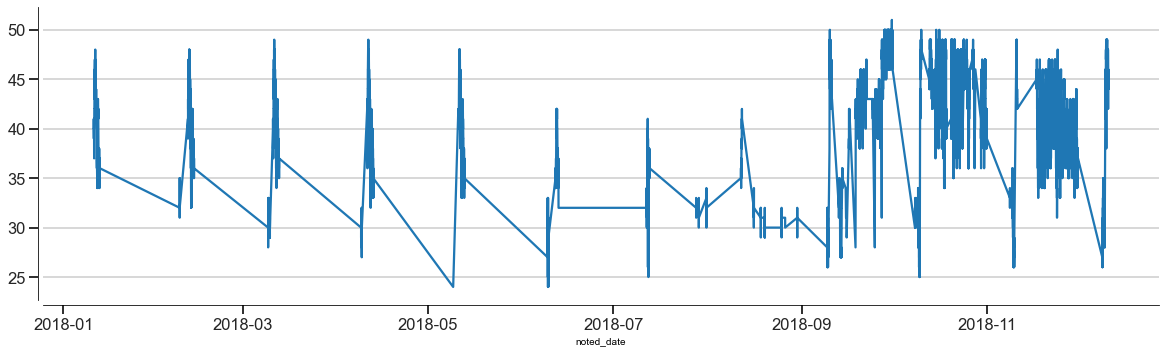

In [3]:
fig, ax= plt.subplots(1, 1, figsize=(20, 6))
sns.set_style("ticks")
sns.set_context("talk")

df.temp.plot(ax=ax)
ax.yaxis.grid(True)
sns.despine(offset=5, trim=False)

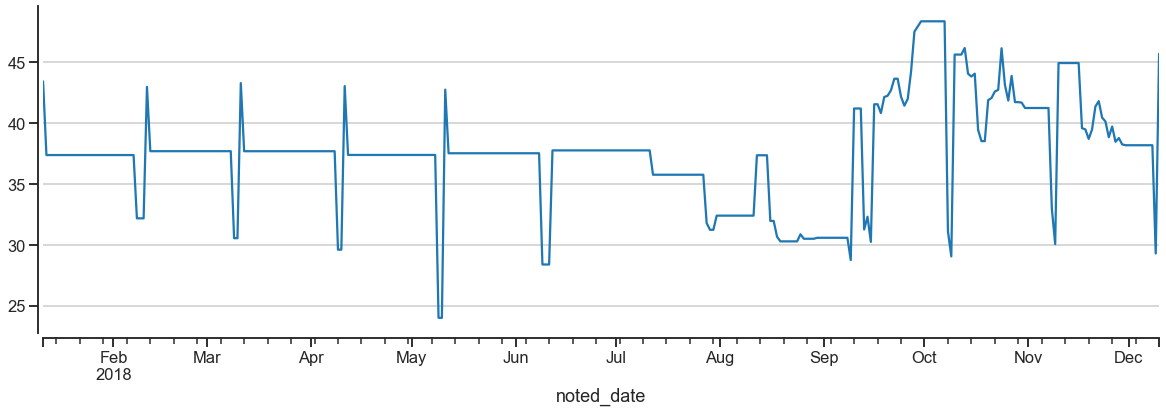

In [4]:
resample_df = df.resample('d')['temp'].mean()
resample_df.ffill(inplace=True)

fig, ax= plt.subplots(1, 1, figsize=(20, 6))
sns.set_style("ticks")
sns.set_context("talk")

resample_df.plot(ax=ax)
ax.yaxis.grid(True)
sns.despine(offset=5, trim=False)

In [5]:
train = resample_df[resample_df.index < '2018-10-01 00:00:00']
test = resample_df[resample_df.index >= '2018-10-01 00:00:00']

In [6]:
train_prophet = train.reset_index().rename(columns={'noted_date':'ds', 'temp':'y'})


In [7]:
from prophet import Prophet

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
model = Prophet(n_changepoints=4)
model.fit(train_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.8953
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      98       569.344   4.99426e-05       18.7065   1.957e-06       0.001      234  LS failed, Hessian reset 
      99       569.344   4.99426e-05       18.7065   1.832e-06       0.001      289  LS failed, Hessian reset 
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -264.977
Iteration  1. Log joint probability =     202.99. Improved by 467.968.
Iteration  2. Log joint probability =    387.359. Improved by 184.369.
Iteration  3. Log joint probability =    435.974. Improved by 48.6144.
Iteration  4. Log joint probability =    503.019. Improved by 67.0453.
Iteration  5. Log joint probability =    510.731. Improved by 7.71145.
Iteration  6. Log joint probability =    514.557. Improved by 3.82653.
Iteration  7. Log joint probability =    549.879. Improve

In [9]:
period = resample_df.shape[0] - train_prophet.shape[0]

In [10]:
future = model.make_future_dataframe(periods=period, freq="d")
forecast = model.predict(future)

/usr/local/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


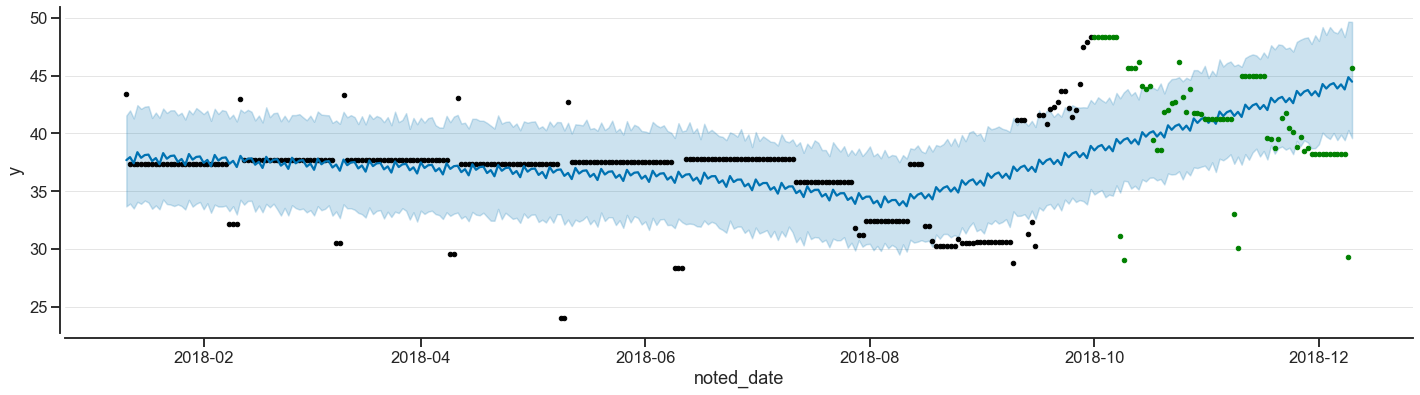

In [11]:
fig, ax= plt.subplots(1, 1, figsize=(20, 6))
sns.set_style("ticks")

sns.set_context("talk")
model.plot(forecast, ax=ax);

test.plot(ax=ax, c="g",marker='.',ls='None');
ax.yaxis.grid(True)

sns.despine(offset=5, trim=False)